In [1]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# for data manipulation
import pandas as pd
import numpy as np

# to plot

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

<ipython-input-1-d2200af25fee>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


In [2]:
# Read the csv file using read_csv
# method of pandas
df = pd.read_csv('Reliance.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
1,2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2,2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
3,2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
4,2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0
...,...,...,...,...,...,...,...
1228,2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
1229,2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
1230,2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0
1231,2020-11-13,1982.000000,2036.650024,1981.750000,1996.400024,1996.400024,20946864.0


# Data Preparation

The data needed to be processed before use such that the date column should act as an index to do that

In [4]:
# Changes The Data columns as index columns
df.index = pd.to_datetime(df['Date'])
df

# drop The original date column

df = df.drop(['Date'], axis='columns')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0
...,...,...,...,...,...,...
2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0
2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0
2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0


# Define the explanatory variables

Explanatory or independent variables are used to predict the value response variable. The X is a dataset that holds the variables which are used for prediction. The X consists of variables such as ‘Open – Close’ and ‘High – Low’. These can be understood as indicators based on which the algorithm will predict tomorrow’s trend. Feel free to add more indicators and see the performance

In [6]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2015-11-18,7.799988,10.674988
2015-11-19,-7.924988,10.725006
2015-11-20,-6.424988,13.625000
2015-11-23,-1.875000,5.850006
2015-11-24,-7.350006,10.274994


# Define the target variable

The target variable is the outcome which the machine learning model will predict based on the explanatory variables. y is a target dataset storing the correct trading signal which the machine learning algorithm will try to predict. If tomorrow’s price is greater than today’s price then we will buy the particular Stock else we will have no position in the. We will store +1 for a buy signal and 0 for a no position in y. We will use where() function from NumPy to do this.

In [7]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([1, 1, 1, ..., 1, 0, 0])

# Split the data into train and test

We will split data into training and test data sets. This is done so that we can evaluate the effectiveness of the model in the test dataset

In [8]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set

X_train = X[:split]
y_train = y[:split]


# Test data set
X_test = X[split:]
y_test = y[split:]

# Support Vector Classifier (SVC)

We will use SVC() function from sklearn.svm.SVC library to create our classifier model using the fit() method on the training data set.

In [11]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

# Assuming X_train is a pandas DataFrame
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with 'median' or 'most_frequent' if needed
X_train_imputed = imputer.fit_transform(X_train)

# Now fit the SVC model with the imputed data
cls = SVC().fit(X_train_imputed, y_train)

# Classifier accuracy

We will compute the accuracy of the algorithm on the train and test the data set by comparing the actual values of the signal with the predicted values of the signal. The function accuracy_score() will be used to calculate the accuracy.


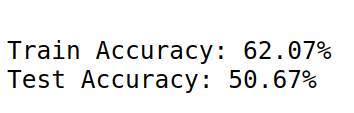

An accuracy of 50%+ in test data suggests that the classifier model is effective.


# Strategy implementation

We will predict the signal (buy or sell) using the cls.predict() function.

In [15]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC

# Assuming 'X' is your DataFrame with missing values
imputer = SimpleImputer(strategy='mean')  # Replace 'mean' with other strategies if needed
X_imputed = imputer.fit_transform(X)

# Now use the imputed data for prediction
df['Predicted_Signal'] = cls.predict(X_imputed)

# Calculate Daily returns

In [16]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()

# Calculate Strategy Returns

In [18]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

# Calculate Cumulative Returns

In [20]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-LOW,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,7.799988,10.674988,10.674988,1,NaN,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-7.924988,10.725006,10.725006,1,0.024945,0.024945,0.024945
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,-6.424988,13.625000,13.625000,1,0.012945,0.012945,0.037890
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,-1.875000,5.850006,5.850006,1,0.007287,0.007287,0.045177
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,-7.350006,10.274994,10.274994,1,0.014626,0.014626,0.059804
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0,-7.550049,48.800049,48.800049,1,0.016507,0.000000,1.750897
2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0,91.800049,116.900024,116.900024,1,-0.041904,-0.041904,1.708994
2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0,1.000000,43.449951,43.449951,0,-0.008612,-0.008612,1.700382


# Calculate Strategy Cumulative Returns

In [22]:
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-LOW,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_strategy,Cum_Strategy
Date,,,,,,,,,,,,,,,
2015-11-18,463.799988,465.649994,454.975006,456.000000,436.671021,5142766.0,7.799988,10.674988,10.674988,1,NaN,NaN,NaN,NaN,NaN
2015-11-19,459.450012,469.350006,458.625000,467.375000,447.563873,5569752.0,-7.924988,10.725006,10.725006,1,0.024945,0.024945,0.024945,0.024945,0.024945
2015-11-20,467.000000,476.399994,462.774994,473.424988,453.357422,5167930.0,-6.424988,13.625000,13.625000,1,0.012945,0.012945,0.037890,0.037890,0.037890
2015-11-23,475.000000,478.950012,473.100006,476.875000,456.661224,4800026.0,-1.875000,5.850006,5.850006,1,0.007287,0.007287,0.045177,0.045177,0.045177
2015-11-24,476.500000,485.799988,475.524994,483.850006,463.340515,6768886.0,-7.350006,10.274994,10.274994,1,0.014626,0.014626,0.059804,0.059804,0.059804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-10,2077.000000,2090.000000,2041.199951,2084.550049,2084.550049,17045147.0,-7.550049,48.800049,48.800049,1,0.016507,0.000000,1.750897,1.846554,1.846554
2020-11-11,2089.000000,2095.000000,1978.099976,1997.199951,1997.199951,26178477.0,91.800049,116.900024,116.900024,1,-0.041904,-0.041904,1.708994,1.804650,1.804650
2020-11-12,1981.000000,2008.449951,1965.000000,1980.000000,1980.000000,18481466.0,1.000000,43.449951,43.449951,0,-0.008612,-0.008612,1.700382,1.796038,1.796038


# Plot Strategy Returns vs Original Returns

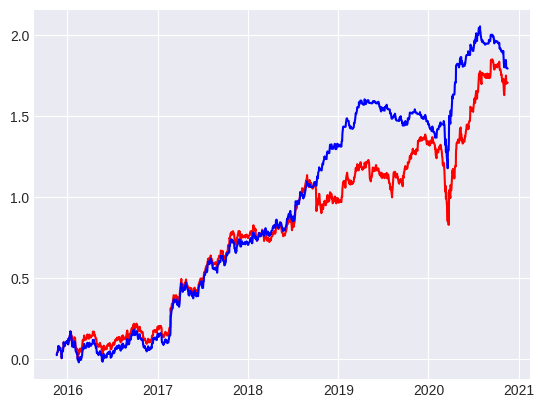

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red') # Use df instead of Df
plt.plot(df['Cum_Strategy'],color='blue') # Use df instead of Df

As You Can See Our Strategy Seem to be Totally Outperforming the Performance of The Reliance Stock. Our Strategy(Blue Line) Provided the return of 18.87 % in the last 1 year whereas the stock of Reliance Industries (Red Line) Provides the Return of just 5.97%  in the last 1 year.

# Back-testing Result
1.  TCS

Stock Return Over Last 1 year -  48%
Strategy result - 48.9 %


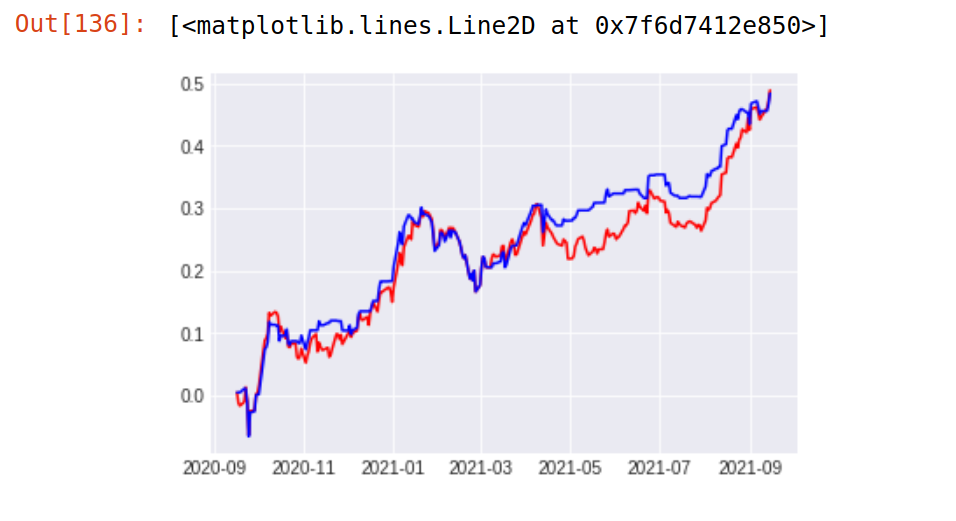

2. ICICI BANK

Stock Return Over Last 1 year -  48%
Strategy result - 48.9 %

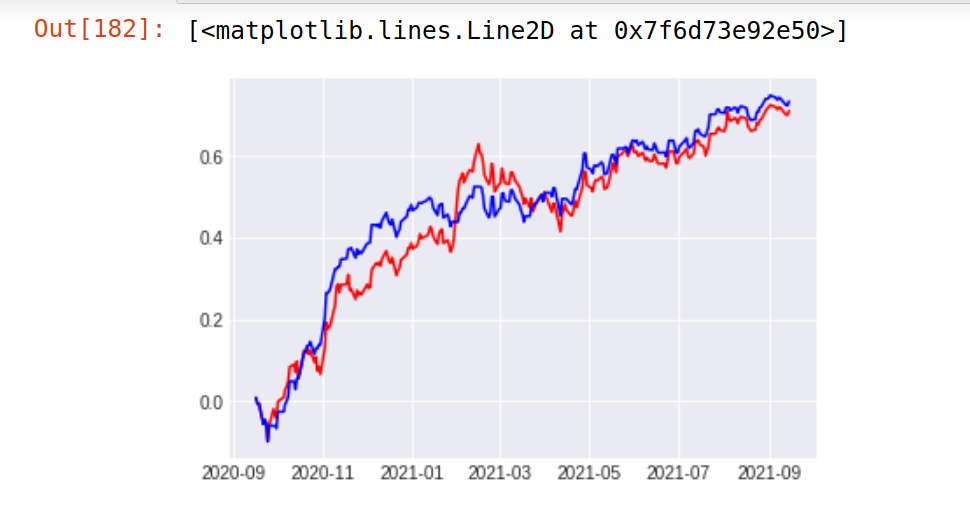